# Data Exploration and Visualization

_Kevin Siswandi, May 2020_

In this notebook, I analyze the data that are simulated using the [2-D yeast glycolysis model](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1300712/). To generate the data, I construct the system of differential equations using three regimes of parameter values:
1. Default regime (resulting in oscillatory behaviour)
2. Damped oscillatory regime
3. Bifurcation regime (the point at which state transition happens)

The resulting data consists of time-series concentrations of ATP and Glucose that mimics the glycolysis pathway in yeast cells.

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

First, we construct the explicit model equations that consists of a system of two equations (for two molecular species).

In [18]:
def f(x,t, params=None):
    """
    2-D Yeast Glycolytic oscillator model
    
    Args:
        x -- a 2 x 1 vector of measurements
        t -- time, ignored
        
    Return:
        A numpy array containing the derivatives
    """
    if params == None:
        # default parameter values
        Vin = 0.36
        k1 = 0.02
        kp = 6
        km = 12
    else:
        Vin = params['Vin']
        k1 = params['k1']
        kp = params['kp']
        km = params['km']
    
    r1 = 2 * k1 * x[0] * x[1] - kp * x[0]/(x[0] + km) # ATP
    r2 = Vin - k1 * x[0] * x[1] #G
    
    return np.ravel(np.array([r1, r2]))

We also specify a few parameters for the simulation, including the start time, end time, time step, and initial values.

In [ ]:
# generate data
t0 = 0
T = 1000 # in seconds
h = 0.2
time_points = np.arange(t0, T, h)
x0 = np.array([4, 3]) #initial conditions: ATP = 4, G = 3

# 1. Default parameter values

Next we solve the system of equations by using the `odeint` function from `scipy`.

In [10]:
bier_data = odeint(f, x0, time_points)

With default parameter values, we see that the system never reaches stable steady-state. Note the abbreviations:
* [G]: concentration of Glucose
* [ATP]: concentration of Adenosine triphosphate

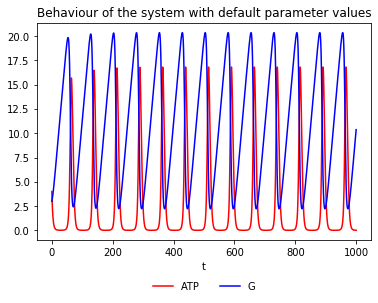

In [14]:
plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
plt.plot(time_points, bier_data[:,1], 'b-', label='G')
plt.xlabel('t')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.title('Behaviour of the system with default parameter values')
plt.show()

Same plot but only up to time t = 200 seconds.

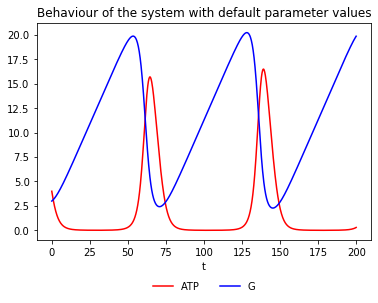

In [16]:
plt.plot(time_points[:1000], bier_data[:1000,0], 'r-', label='ATP')
plt.plot(time_points[:1000], bier_data[:1000,1], 'b-', label='G')
plt.xlabel('t')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.title('Behaviour of the system with default parameter values')
plt.show()

# 2. Trying different parameter values

We want to see:
1. Which parameter sets lead to sustained oscillations?
2. Do parameters affect oscillation frequency and amplitude?
3. Which parameter sets lead to damped oscillations?

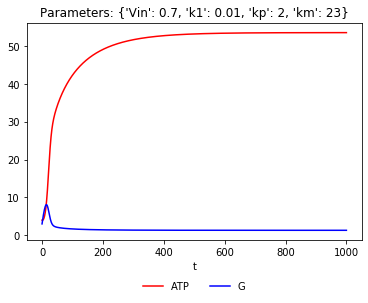

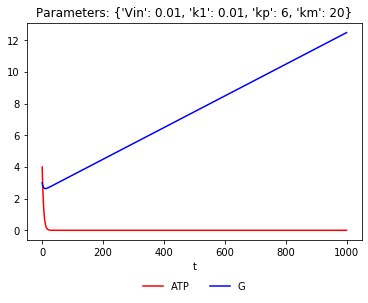

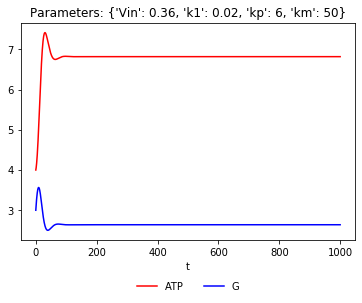

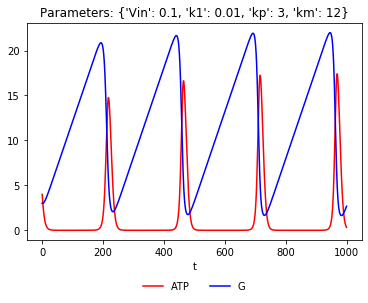

In [21]:
#parameter_dict = {'Vin': 0.7, 'k1': 0.01, 'kp':2, 'km':23}
parameter_list = [{'Vin': 0.7, 'k1': 0.01, 'kp':2, 'km':23}, {'Vin': 0.01, 'k1': 0.01, 'kp':6, 'km':20},
                 {'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':50},{'Vin': 0.1, 'k1': 0.01, 'kp':3, 'km':12}]
for parameter_dict in parameter_list:
    bier_data = odeint(f, x0, time_points, args=(parameter_dict,))
    plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
    plt.plot(time_points, bier_data[:,1], 'b-', label='G')
    plt.xlabel('t')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
    plt.title('Parameters: ' + str(parameter_dict))
    plt.show()

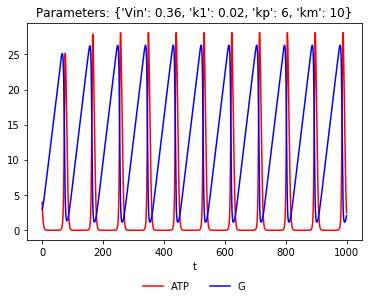

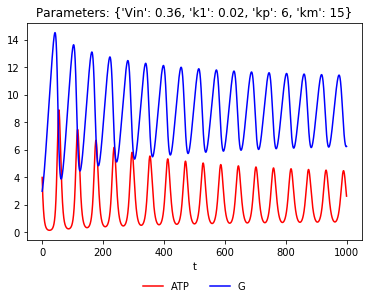

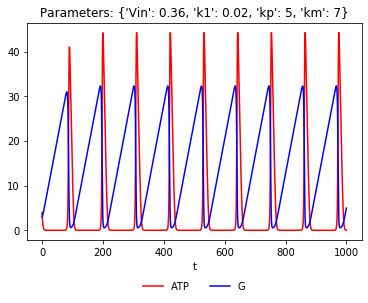

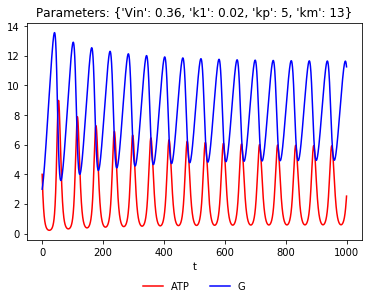

In [22]:
#parameter_dict = {'Vin': 0.7, 'k1': 0.01, 'kp':2, 'km':23}
parameter_list = [
                 {'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':10},{'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':15},
                    {'Vin': 0.36, 'k1': 0.02, 'kp':5, 'km':7}, {'Vin': 0.36, 'k1': 0.02, 'kp':5, 'km':13}]
for parameter_dict in parameter_list:
    bier_data = odeint(f, x0, time_points, args=(parameter_dict,))
    plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
    plt.plot(time_points, bier_data[:,1], 'b-', label='G')
    plt.xlabel('t')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
    plt.title('Parameters: ' + str(parameter_dict))
    plt.show()

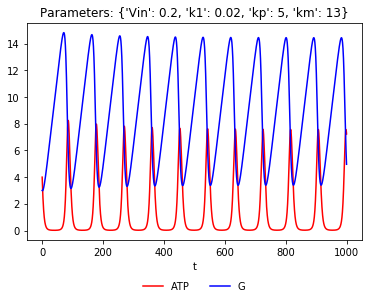

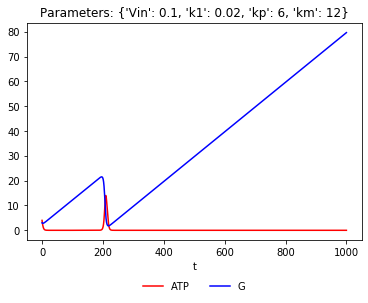

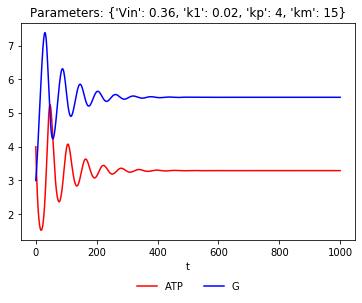

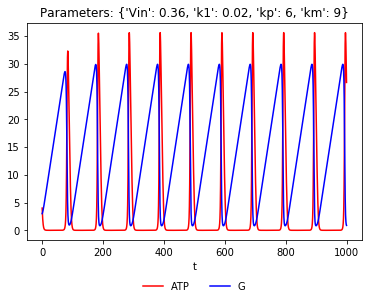

In [23]:
#parameter_dict = {'Vin': 0.7, 'k1': 0.01, 'kp':2, 'km':23}
time_points = np.arange(t0, T, h)
parameter_list = [
                 {'Vin': 0.2, 'k1': 0.02, 'kp':5, 'km':13},{'Vin': 0.1, 'k1': 0.02, 'kp':6, 'km':12},
                    {'Vin': 0.36, 'k1': 0.02, 'kp':4, 'km':15}, {'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':9}]
for parameter_dict in parameter_list:
    bier_data = odeint(f, x0, time_points, args=(parameter_dict,))
    plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
    plt.plot(time_points, bier_data[:,1], 'b-', label='G')
    plt.xlabel('t')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
    plt.title('Parameters: ' + str(parameter_dict))
    plt.show()

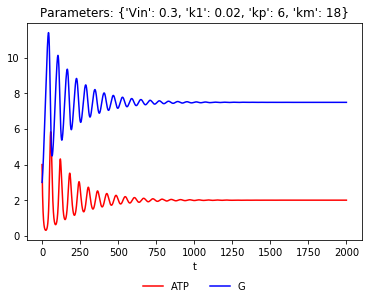

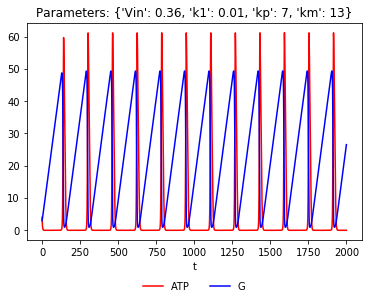

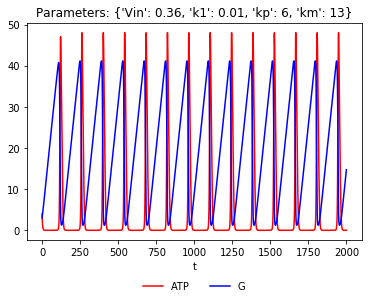

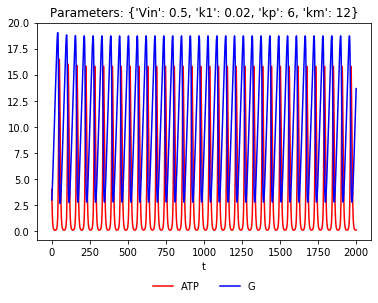

In [24]:
time_points = np.arange(t0, 2000, h)
parameter_list = [
                 {'Vin': 0.3, 'k1': 0.02, 'kp':6, 'km':18},{'Vin': 0.36, 'k1': 0.01, 'kp':7, 'km':13},
                    {'Vin': 0.36, 'k1': 0.01, 'kp':6, 'km':13}, {'Vin': 0.5, 'k1': 0.02, 'kp':6, 'km':12}]
for parameter_dict in parameter_list:
    bier_data = odeint(f, x0, time_points, args=(parameter_dict,))
    plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
    plt.plot(time_points, bier_data[:,1], 'b-', label='G')
    plt.xlabel('t')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
    plt.title('Parameters: ' + str(parameter_dict))
    plt.show()

**Summary**

We see that \[G\] and \[ATP\] can:
1. oscillate indefinitely in a stable limit cycle,
2. converge to a stable fixed point (damped oscillations)
3. quickly reach steady state
4. one species increasing but the other decaying to zero

# 3. Simulation analysis

Let's study how the glucose transport rate $V_{in}$ changes the oscillatory behaviour.

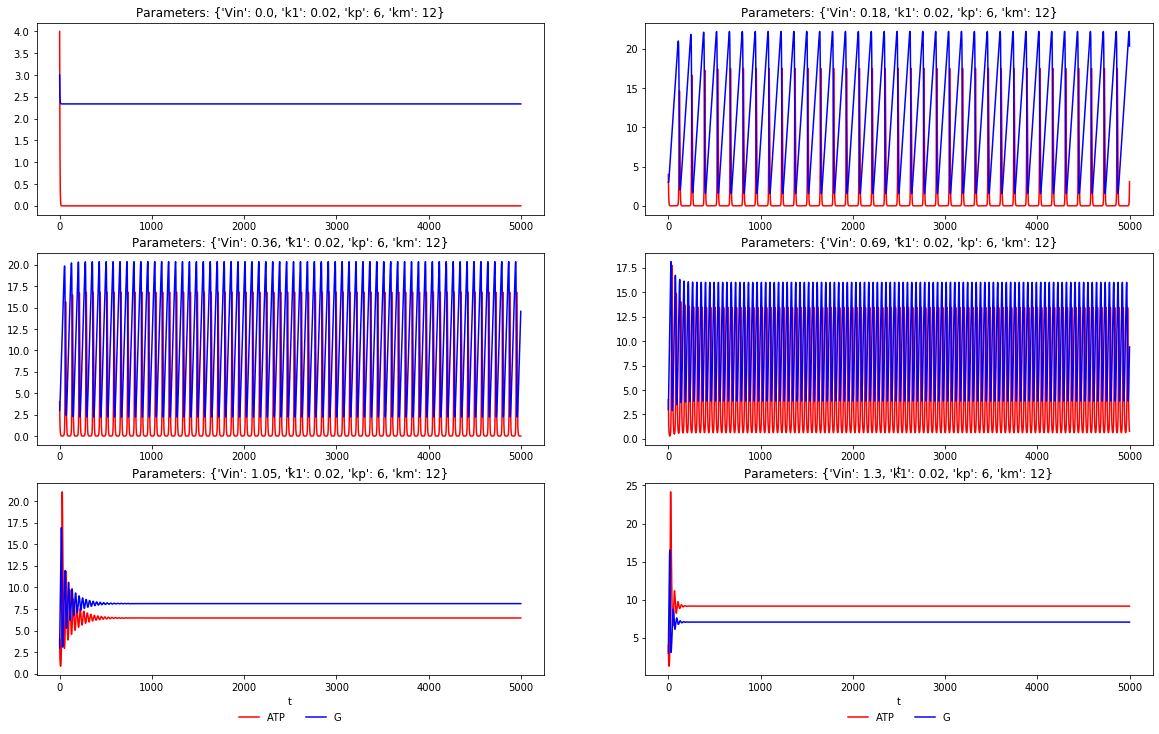

In [50]:
time_points = np.arange(t0, 5000, h)
parameter_list = [{'Vin': 0., 'k1': 0.02, 'kp':6, 'km':12},
                  {'Vin': 0.18, 'k1': 0.02, 'kp':6, 'km':12},
                 {'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':12},
                 {'Vin': 0.69, 'k1': 0.02, 'kp':6, 'km':12},
                 {'Vin': 1.05, 'k1': 0.02, 'kp':6, 'km':12},
                 {'Vin': 1.3, 'k1': 0.02, 'kp':6, 'km':12}]

plt.figure(figsize=(20, 12))
for i, parameter_dict in enumerate(parameter_list):
    plt.subplot(3, 2, i+1)
    bier_data = odeint(f, x0, time_points, args=(parameter_dict,))
    plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
    plt.plot(time_points, bier_data[:,1], 'b-', label='G')
    plt.xlabel('t')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
    plt.title('Parameters: ' + str(parameter_dict))
plt.show()

When $V_{in}$ is higher than a threshold value, no sustained oscillations happen. Now let's see how the Michaelis constant affects the oscillatory behaviour.

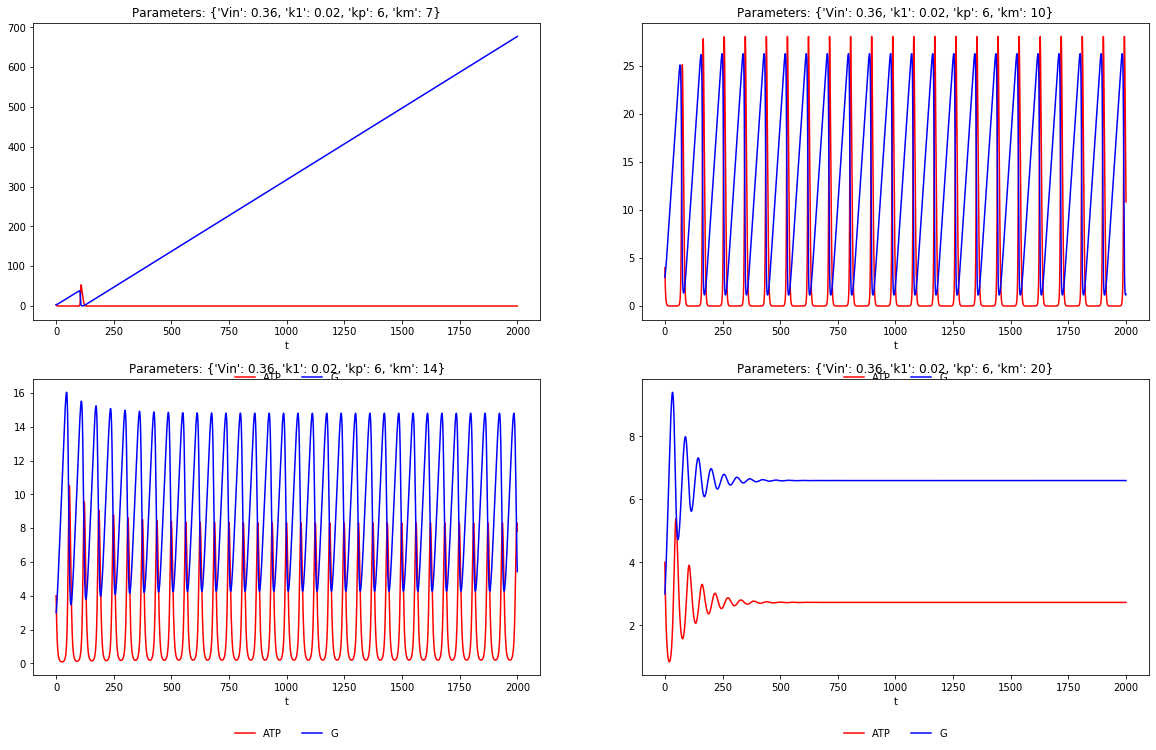

In [29]:
time_points = np.arange(t0, 2000, h)
parameter_list = [{'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':7},
                 {'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':10},
                 {'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':14},
                 {'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':20}]
plt.figure(figsize=(20, 12))
for i, parameter_dict in enumerate(parameter_list):
    plt.subplot(2, 2, i+1)
    bier_data = odeint(f, x0, time_points, args=(parameter_dict,))
    plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
    plt.plot(time_points, bier_data[:,1], 'b-', label='G')
    plt.xlabel('t')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
    plt.title('Parameters: ' + str(parameter_dict))
plt.show()

Within a certain range of values of Km, we see oscillations in Glucose and ATP. OK good, now let's try to find the bifurcation point (first for $V_{in}$.)

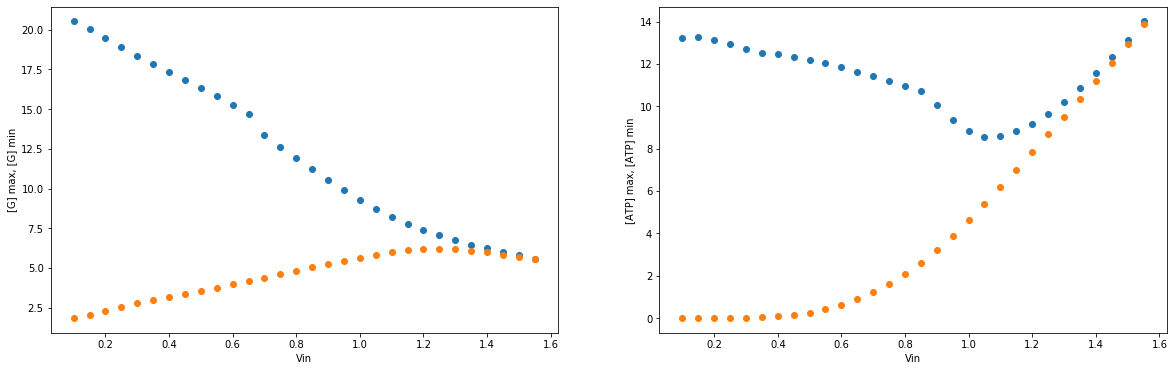

In [51]:
time_points = np.arange(t0, 2000, 0.05)
rate_array = np.arange(0.1, 1.6, 0.05)
parameter_list = [{'Vin': rate, 'k1': 0.02, 'kp':6, 'km':13} for rate in rate_array]
Gmax_list, Gmin_list = [], []
ATPmax_list, ATPmin_list = [], []
for i, parameter_dict in enumerate(parameter_list):
    bier_data = odeint(f, x0, time_points, args=(parameter_dict,))
    G_max, G_min = bier_data[1500:,1].max(), bier_data[1500:,1].min()
    ATP_max, ATP_min = bier_data[1500:,0].max(), bier_data[1500:,0].min()
    Gmax_list.append(G_max)
    Gmin_list.append(G_min)
    ATPmax_list.append(ATP_max)
    ATPmin_list.append(ATP_min)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(rate_array, Gmax_list, 'o')
plt.plot(rate_array, Gmin_list, 'o')
plt.xlabel('Vin')
plt.ylabel('[G] max, [G] min')

plt.subplot(1, 2, 2)
plt.plot(rate_array, ATPmax_list, 'o')
plt.plot(rate_array, ATPmin_list, 'o')
plt.xlabel('Vin')
plt.ylabel('[ATP] max, [ATP] min')

plt.show()

We can see that the oscillations are ceased by increasing the glucose transport rate. The steady state concentration of glucose decreases further with increased ATP concentration.